In [1]:
%load_ext autoreload
%autoreload 2

# Get parent directory and add to sys.path
import os
import sys

parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)

# Require ipympl
%matplotlib widget 

In [2]:
# MPC import
import numpy as np
from LinearMPC.MPCVelControl import MPCVelControl
from src.rocket import Rocket
from src.vel_rocket_vis import RocketVis

rocket_obj_path = os.path.join(parent_dir, "Cartoon_rocket.obj")
rocket_params_path = os.path.join(parent_dir, "rocket.yaml")

Simulation and Set Plotting


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

Maximum invariant set successfully computed after 15 iterations for X MPC.


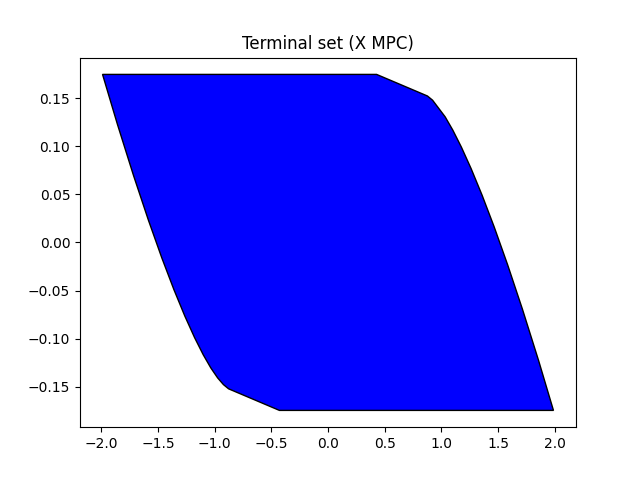

Maximum invariant set successfully computed after 15 iterations for Y MPC.


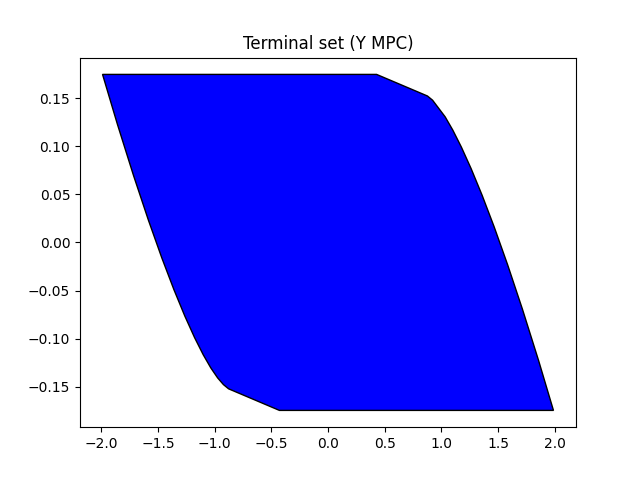

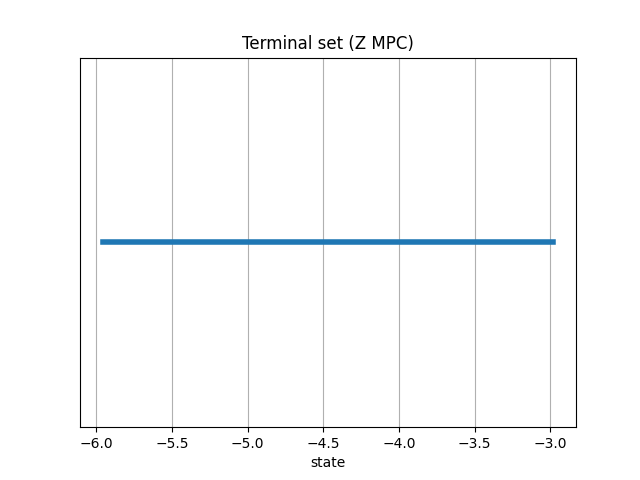

Maximum invariant set successfully computed after 46 iterations for Roll MPC.


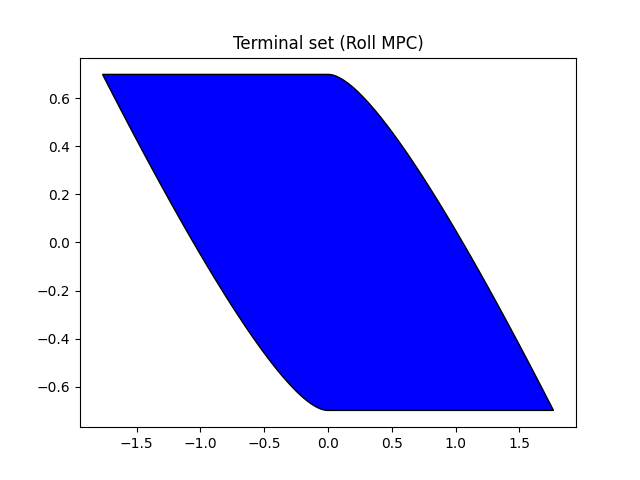

In [3]:
Ts = 0.05
sim_time = 7
H = 5.0
x0 = np.array([0, #wx [rad/s] y-MPC
               0, #wy [rad/s] x-MPC
               0, #wz [rad/s] roll-MPC
               np.deg2rad(0), #alpha [rad] y-MPC
               np.deg2rad(0), #beta [rad] x-MPC
               np.deg2rad(0), #gamma [rad] roll-MPC
               0, #vx [m/s] x-MPC
               0, #vy [m/s] y-MPC
               0, #vz [m/s] z-MPC
               0, #x [m]
               0, #y [m]
               0  #z [m]
               ])  # initial state  
x_target = np.array([0, #wx [rad/s] y-MPC
               0, #wy [rad/s] x-MPC
               0, #wz [rad/s] roll-MPC
               np.deg2rad(0), #alpha [rad] y-MPC
               np.deg2rad(0), #beta [rad] x-MPC
               np.deg2rad(35), #gamma [rad] roll-MPC
               3, #vx [m/s] x-MPC
               3, #vy [m/s] y-MPC
               3, #vz [m/s] z-MPC
               0, #x [m]
               0, #y [m]
               0  #z [m]
               ]) # target state

rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
mpc = MPCVelControl().new_controller(rocket, Ts, H)

t_cl, x_cl, u_cl, t_ol, x_ol, u_ol, _ = rocket.simulate_control(
    mpc, sim_time, H, x0, x_target=x_target, method="linear"
)

Result plots

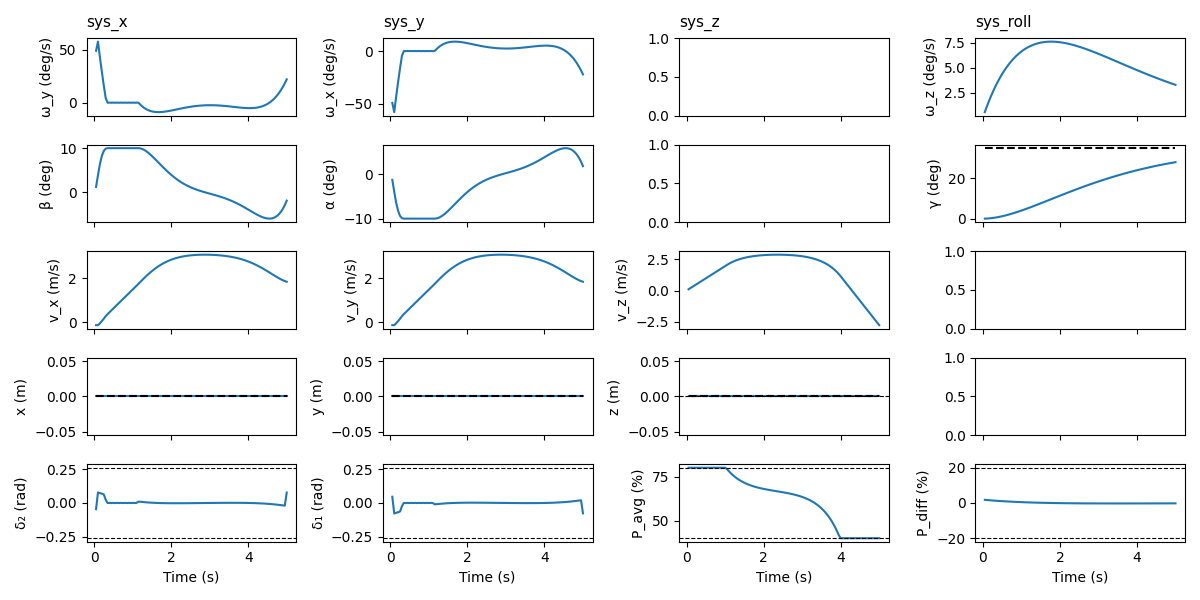

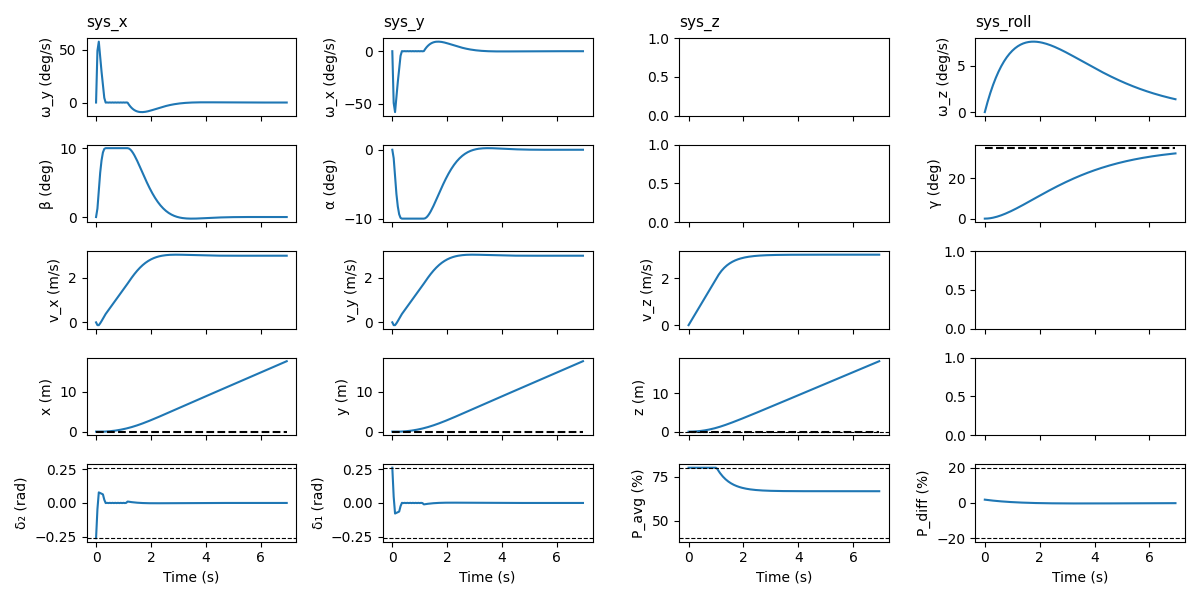

In [6]:
from src.vel_rocket_vis import plot_static_states_inputs
#Open Loop
plot_static_states_inputs(t_ol[:-1,1], x_ol[:,:-1,1], u_ol[...,1],Ref=x_target)
#Closed loop
plot_static_states_inputs(t_cl[:-1], x_cl[:,:-1], u_cl,Ref=x_target)

Open Loop Plots

In [ ]:
vis = RocketVis(rocket, rocket_obj_path)
vis.anim_rate = 1.0
vis.animate(
    t_cl[:-1]*0,
    x_cl[:, :-1]*0,
    u_cl*0,
    Ref=x_target.reshape(-1, 1).repeat(u_cl.shape[1], axis=1),
    T_ol=t_ol[..., :-1],
    X_ol=x_ol,
    U_ol=u_ol,
);

c:\Users\hippo\Documents\Personal files\EPFL\Courses\MPC\MPC-Course-EPFL_AO\project\src\vel_rocket_vis.py:416: RuntimeWarning: divide by zero encountered in scalar divide
  step = max(1, np.ceil(1 / (Ts * max_fps)).astype(int))
c:\Users\hippo\Documents\Personal files\EPFL\Courses\MPC\MPC-Course-EPFL_AO\project\src\vel_rocket_vis.py:416: RuntimeWarning: invalid value encountered in cast
  step = max(1, np.ceil(1 / (Ts * max_fps)).astype(int))


AppLayout(children=(HBox(children=(Play(value=0, description='Press play', interval=0, max=139), IntSlider(val…

 JS Error => error: Uncaught SyntaxError: Unexpected string
 JS Error => error: Uncaught SyntaxError: Unexpected string
 JS Error => error: Uncaught SyntaxError: Unexpected string


Closed Loop Plots

In [ ]:
vis = RocketVis(rocket, rocket_obj_path)
vis.anim_rate = 1.0
vis.animate(
    t_cl[:-1],
    x_cl[:, :-1],
    u_cl,
    Ref=x_target.reshape(-1, 1).repeat(u_cl.shape[1], axis=1),
);

AppLayout(children=(HBox(children=(Play(value=0, description='Press play', max=139, step=2), IntSlider(value=0…

Closed and Open Loop Plots

In [ ]:
vis = RocketVis(rocket, rocket_obj_path)
vis.anim_rate = 1.0
vis.animate(
    t_cl[:-1],
    x_cl[:, :-1],
    u_cl,
    Ref=x_target.reshape(-1, 1).repeat(u_cl.shape[1], axis=1),
    T_ol=t_ol[..., :-1],
    X_ol=x_ol,
    U_ol=u_ol,
);

AppLayout(children=(HBox(children=(Play(value=0, description='Press play', max=139, step=2), IntSlider(value=0…